In [3]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import os


In [4]:
df=pd.read_csv("/Users/mobaisonoinam/Documents/scikit/heartfail/heart.csv")
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


preprocessing

In [5]:
sex=LabelEncoder()
cpt=LabelEncoder()
recg=LabelEncoder()
ea=LabelEncoder()
st=LabelEncoder()

In [6]:
df['Sex']=sex.fit_transform(df['Sex'])
df['ChestPainType']=cpt.fit_transform(df['ChestPainType'])
df['RestingECG']=recg.fit_transform(df['RestingECG'])
df['ExerciseAngina']=ea.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=st.fit_transform(df['ST_Slope'])

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<Axes: >

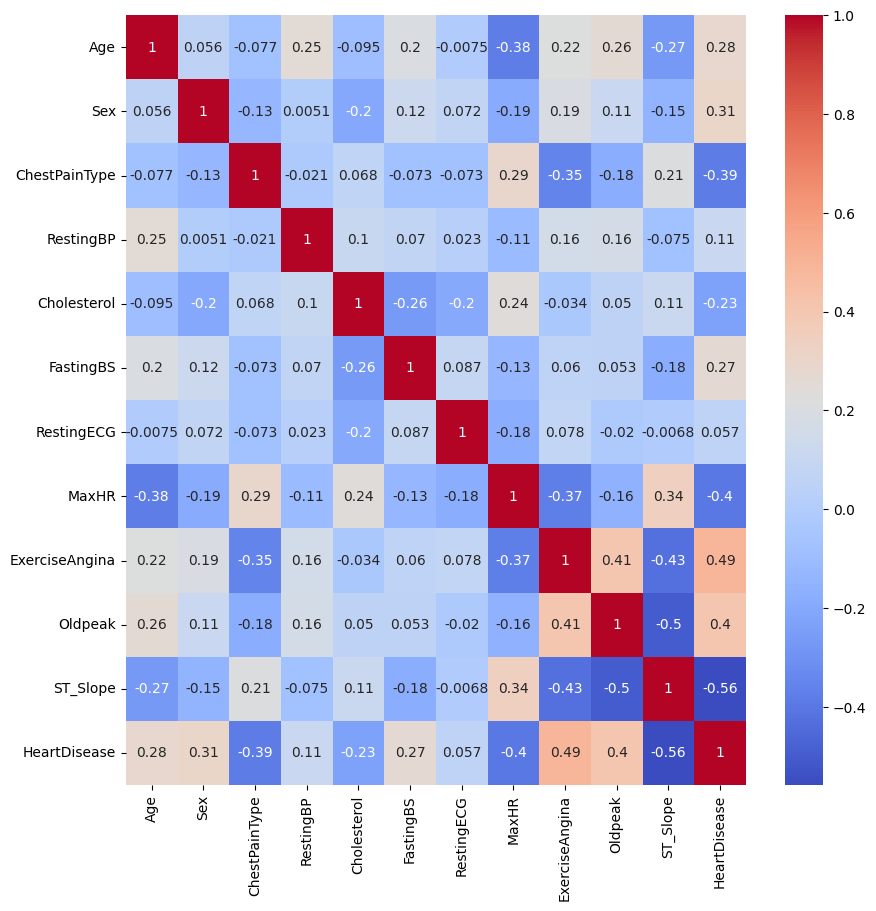

In [8]:
corr_matrix=df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [9]:
thresh_hold=0.2
select_feat=corr_matrix.index[abs(corr_matrix['HeartDisease'])>=thresh_hold].to_list()
select_feat.remove('HeartDisease')
print(select_feat)

['Age', 'Sex', 'ChestPainType', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [10]:
selected_features=df[select_feat]
selected_features.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,289,0,172,0,0.0,2
1,49,0,2,180,0,156,0,1.0,1
2,37,1,1,283,0,98,0,0.0,2
3,48,0,0,214,0,108,1,1.5,1
4,54,1,2,195,0,122,0,0.0,2


In [11]:
target=df['HeartDisease']
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [12]:
scaler=StandardScaler()
selected_features=scaler.fit_transform(selected_features)
selected_features

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(selected_features,target,test_size=0.2)

svm

In [14]:
from sklearn.svm import SVC

SVM_model=SVC()
SVM_model.fit(x_train,y_train)

SVC()

In [20]:
svm_pred=SVM_model.predict(x_test)

SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION REPORT
Accuracy:  0.8478  (84%)
Precision: 0.8571  (85%)
Recall:    0.8889  (88%)
F1 Score:  0.8727  (87%)


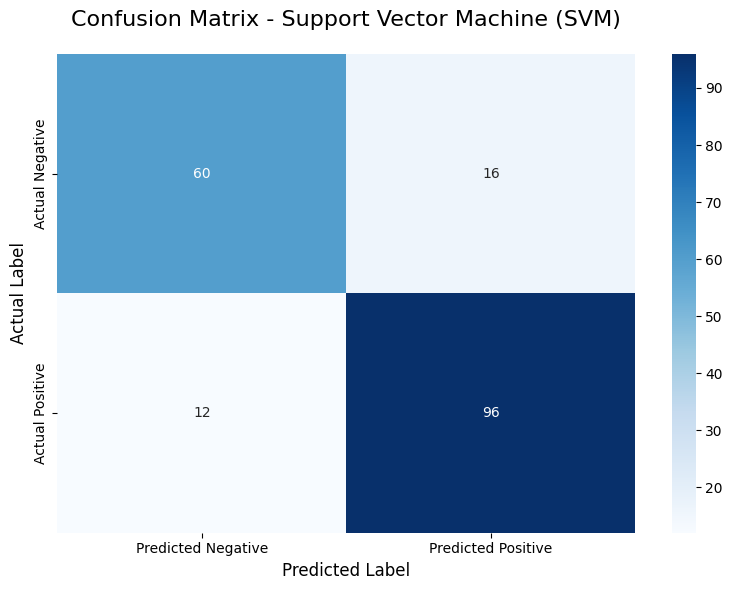

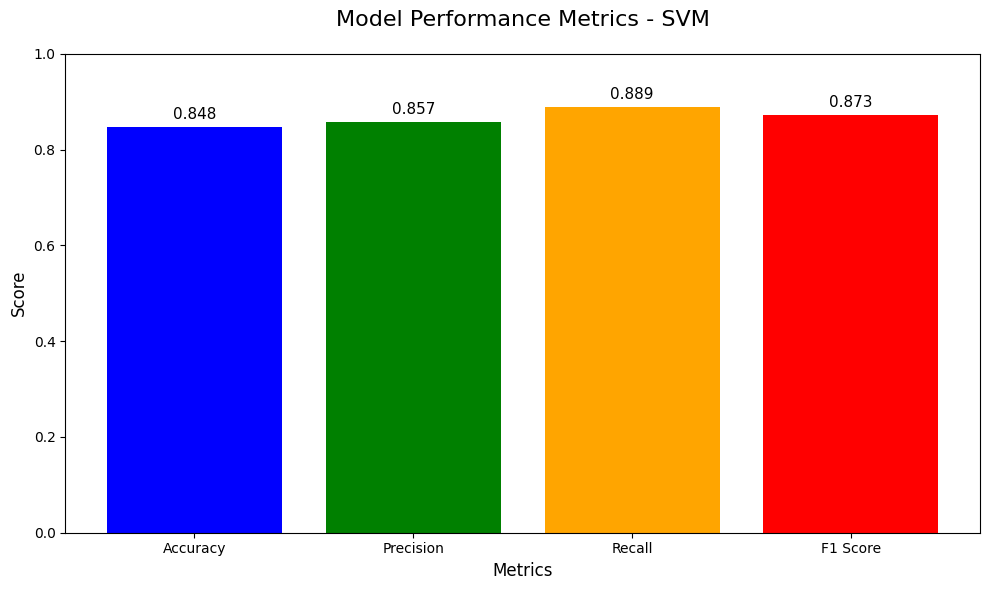

In [ ]:

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, zero_division=0)
recall = recall_score(y_test, svm_pred, zero_division=0)
f1 = f1_score(y_test, svm_pred, zero_division=0)

#  Print metrics
print("=" * 50)
print("SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION REPORT")
print("=" * 50)
print(f"Accuracy:  {accuracy:.4f}  ({int(accuracy * 100)}%)")
print(f"Precision: {precision:.4f}  ({int(precision * 100)}%)")
print(f"Recall:    {recall:.4f}  ({int(recall * 100)}%)")
print(f"F1 Score:  {f1:.4f}  ({int(f1 * 100)}%)")
print("=" * 50)
cm = confusion_matrix(y_test, svm_pred)



# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Support Vector Machine (SVM)', fontsize=16, pad=20)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()
# 

# Bar chart of all metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])
plt.title('Model Performance Metrics - SVM', fontsize=16, pad=20)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)

# Add value labels on top of bars
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

saving model

In [ ]:
import pickle

# After training your SVM model
model_data = {
    'model': SVM_model,
    'scaler': scaler,  # if you used StandardScaler
    'label_encoder': LabelEncoder  # if you encoded any features
}

with open('heart_disease_svm_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

accuracy

In [14]:
accuracy=accuracy_score(y_test,svm_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 83 %


In [15]:
#knn
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
knn_pred=KNN_model.predict(x_test)

In [17]:
accuracy=accuracy_score(y_test,knn_pred)

print("Accuracy=",int(accuracy*100),'%')

Accuracy= 81 %


DecisionTreeClassifier()

Accuracy= 78 %


['heart_model.pkl']

No Heart Disease
